# Why Students Quit Online Courses?

This project explores patterns in student engagement to understand
why learners drop out of online courses before completion.

Goal:
- Identify early signals of dropout
- Understand which factors matter most
- Provide actionable insights

Dataset (From Kaggle) : https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset


In [164]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [165]:
df = pd.read_csv('online_course_engagement_data.csv')

# Showcase Data
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


## **Features**: From kaggle (Source : https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset)

- **UserID**: Unique identifier for each user
- **CourseCategory**: Category of the course taken by the user (e.g., Programming, Business, Arts)
- **TimeSpentOnCourse**: Total time spent by the user on the course in hours
- **NumberOfVideosWatched**: Total number of videos watched by the user
- **NumberOfQuizzesTaken**: Total number of quizzes taken by the user
- **QuizScores**: Average scores achieved by the user in quizzes (percentage)
- **CompletionRate**: Percentage of course content completed by the user
- **DeviceType**: Type of device used by the user (Device Type: Desktop (0) or Mobile (1))
- **CourseCompletion (Target Variable)**: Course completion status (0: Not Completed, 1: Completed)

## **Basic Data Cleaning and Analysis**

In [166]:
# Checking DataFrame 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   str    
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), str(1)
memory usage: 632.9 KB


In [167]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [168]:
# Checking all columns
df.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='str')

In [169]:
df.shape

(9000, 9)

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
df.shape

(8123, 9)

In [172]:
# Total Numbers for Course Categories 
df['CourseCategory'].value_counts()

CourseCategory
Business       1657
Health         1634
Programming    1633
Science        1629
Arts           1570
Name: count, dtype: int64

## Dataframe has no null values, and there are 5 integer columns, 1 string column and 3 float column. (Feature Engineering)

## ***Most Suitable opertions:***

- Converting float values from **TimeSpentOnCourse, QuizScores, CompletionRate** to 2 decimal float as 6 digit float doesn' t make sense.

- Droping **UserID** because its irrelevant.

- Applying OneHotEncoding in **CourseCategory** column as there are 5 fields : *Business, Health, Science, Programming and Arts*.

- Dividing **CompletionRate** and **QuizScores** into 4 bins based on quartiles

In [173]:
# Making columns for each CourseCategory items
Cleaned_Df = pd.get_dummies(df, columns=['CourseCategory'], drop_first=True)

Cleaned_Df.head()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,5618,29.979719,17,3,50.365656,20.860773,1,0,False,True,False,False
1,4326,27.802640,1,5,62.615970,65.632415,1,0,False,False,False,False
2,5849,86.820485,14,2,78.458962,63.812007,1,1,False,False,False,False
3,4992,35.038427,17,10,59.198853,95.433162,0,1,False,False,False,True
4,3866,92.490647,16,0,98.428285,18.102478,0,0,False,False,True,False


In [174]:
# Converting all True False values to 1s and 0s
Cleaned_Df[['CourseCategory_Business', 'CourseCategory_Health', 'CourseCategory_Programming', 'CourseCategory_Science']] = Cleaned_Df[['CourseCategory_Business', 'CourseCategory_Health', 'CourseCategory_Programming', 'CourseCategory_Science']].astype(int)

In [175]:
# Now Droping UserID column
Cleaned_Df.drop(columns=['UserID'], inplace=True)

In [176]:
# Converting floats to .2f values
Cleaned_Df[['TimeSpentOnCourse', 'QuizScores', 'CompletionRate']] = Cleaned_Df[['TimeSpentOnCourse', 'QuizScores', 'CompletionRate']].astype(float).round(2)

In [177]:
# Showcase
Cleaned_Df.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,29.98,17,3,50.37,20.86,1,0,0,1,0,0
1,27.80,1,5,62.62,65.63,1,0,0,0,0,0
2,86.82,14,2,78.46,63.81,1,1,0,0,0,0
3,35.04,17,10,59.20,95.43,0,1,0,0,0,1
4,92.49,16,0,98.43,18.10,0,0,0,0,1,0


### Creating Bins for CompletionRate and QuizScores

In [178]:
# Bins for CompletionRate
Cleaned_Df['Rate_batch'] = pd.cut(
    Cleaned_Df['CompletionRate'],
    bins = [0, 25, 50, 75, float('inf')],
    labels = ['Q1', 'Q2', 'Q3', 'Q4']
)

# Bins for QuizScores
Cleaned_Df['Score_batch'] = pd.cut(
    Cleaned_Df['QuizScores'],
    bins = [0, 25, 50, 75, float('inf')],
    labels = ['S1', 'S2', 'S3', 'S4']
)

In [179]:
# Encoding Score_batch and Rate_batch
Cleaned_Df = pd.get_dummies(Cleaned_Df, columns=['Rate_batch', 'Score_batch'], drop_first=True)

In [180]:
# Converting True and False to 1s and 0s
Cleaned_Df[['Rate_batch_Q2', 'Rate_batch_Q3', 'Rate_batch_Q4', 'Score_batch_S2', 'Score_batch_S3','Score_batch_S4']] = Cleaned_Df[['Rate_batch_Q2', 'Rate_batch_Q3', 'Rate_batch_Q4', 'Score_batch_S2', 'Score_batch_S3','Score_batch_S4']].astype(int)

In [181]:
Cleaned_Df.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,Rate_batch_Q2,Rate_batch_Q3,Rate_batch_Q4,Score_batch_S2,Score_batch_S3,Score_batch_S4
0,29.98,17,3,50.37,20.86,1,0,0,1,0,0,0,0,0,0,1,0
1,27.80,1,5,62.62,65.63,1,0,0,0,0,0,0,1,0,0,1,0
2,86.82,14,2,78.46,63.81,1,1,0,0,0,0,0,1,0,0,0,1
3,35.04,17,10,59.20,95.43,0,1,0,0,0,1,0,0,1,0,1,0
4,92.49,16,0,98.43,18.10,0,0,0,0,1,0,0,0,0,0,0,1


### Checking weather data is equally distributed or not

In [182]:
Cleaned_Df['CourseCompletion'].value_counts() # Equally distributed

CourseCompletion
0    4555
1    3568
Name: count, dtype: int64

In [183]:
Cleaned_Df['DeviceType'].value_counts() # Equally distributed

DeviceType
1    4065
0    4058
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA)** 

In [184]:
Cleaned_Df.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,Rate_batch_Q2,Rate_batch_Q3,Rate_batch_Q4,Score_batch_S2,Score_batch_S3,Score_batch_S4
0,29.98,17,3,50.37,20.86,1,0,0,1,0,0,0,0,0,0,1,0
1,27.80,1,5,62.62,65.63,1,0,0,0,0,0,0,1,0,0,1,0
2,86.82,14,2,78.46,63.81,1,1,0,0,0,0,0,1,0,0,0,1
3,35.04,17,10,59.20,95.43,0,1,0,0,0,1,0,0,1,0,1,0
4,92.49,16,0,98.43,18.10,0,0,0,0,1,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Heatmap')

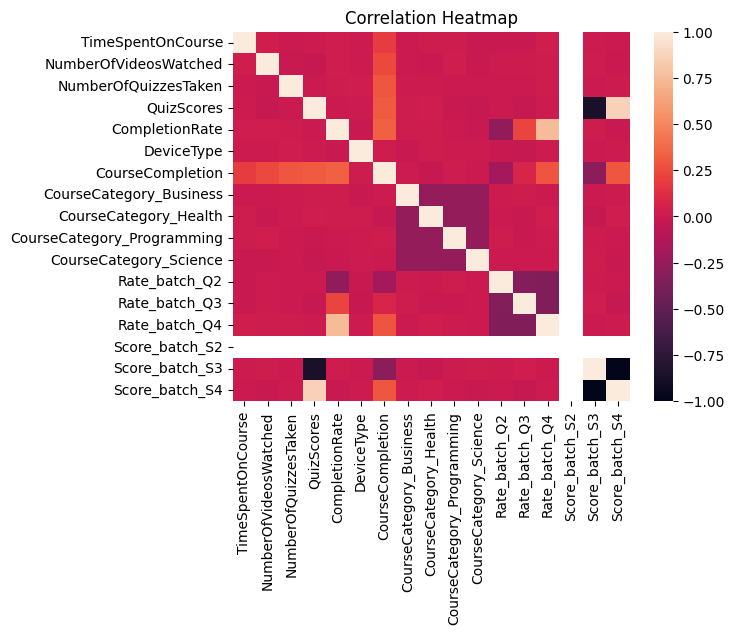

In [185]:
#Plotting Heatmap to Show the correlation between columns
sns.heatmap(Cleaned_Df.corr(numeric_only=True))
plt.title("Correlation Heatmap")

This columns : **'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate'** have the highest correlation with **CourseCompletion**

<Axes: xlabel='CourseCompletion', ylabel='Count'>

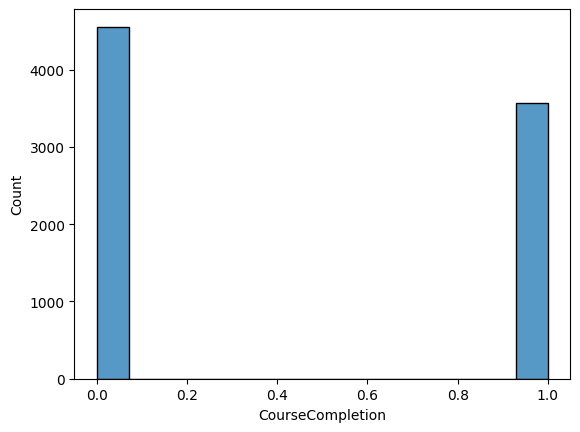

In [186]:
sns.histplot(df, x=df['CourseCompletion'])
# Course Complition Summary

Text(0.5, 1.0, 'Course Complition Between Mobile and Desktop Users')

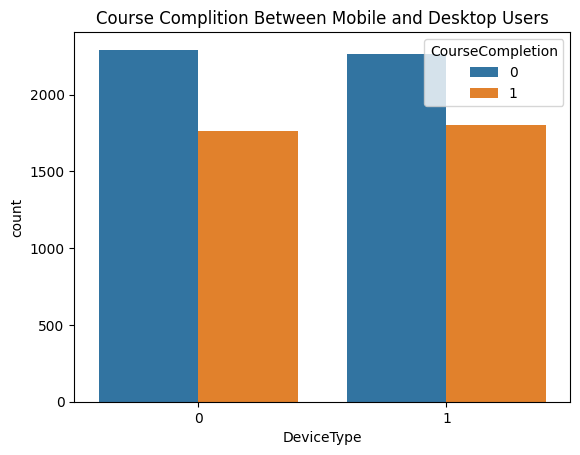

In [187]:
sns.countplot(x=Cleaned_Df['DeviceType'], hue=Cleaned_Df['CourseCompletion'])
plt.title("Course Complition Between Mobile and Desktop Users")
# Here CourseCompletion is same for Mobile as well as Desktop users, no such platform difference also its corr is 0.1

Text(0.5, 1.0, 'Course complition rate V/s Users Completed')

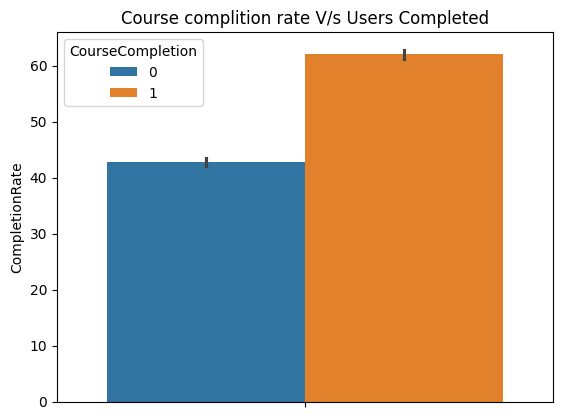

In [188]:
sns.barplot(y=df['CompletionRate'], hue=df['CourseCompletion'])
plt.title("Course complition rate V/s Users Completed")
# CourseCompletion is directly proportional to CompletionRate

<Axes: ylabel='QuizScores'>

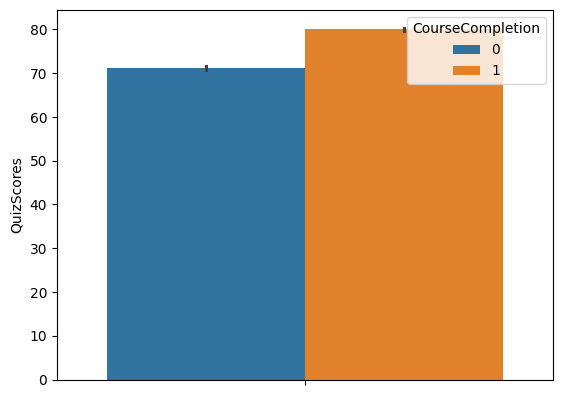

In [189]:
sns.barplot(y=Cleaned_Df['QuizScores'], hue=Cleaned_Df['CourseCompletion'])
# CourseCompletion is Partially proportional to QuizScores

<Axes: ylabel='NumberOfQuizzesTaken'>

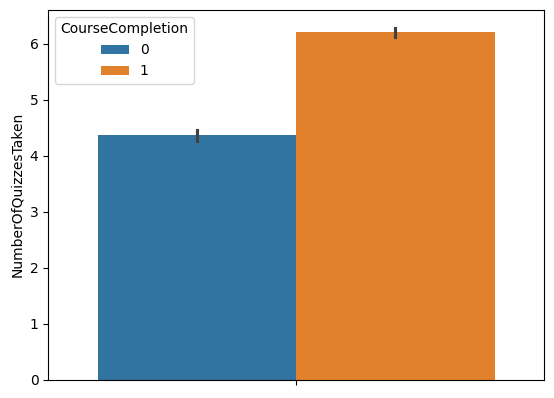

In [190]:
sns.barplot(y=Cleaned_Df['NumberOfQuizzesTaken'], hue=Cleaned_Df['CourseCompletion'])

<Axes: ylabel='TimeSpentOnCourse'>

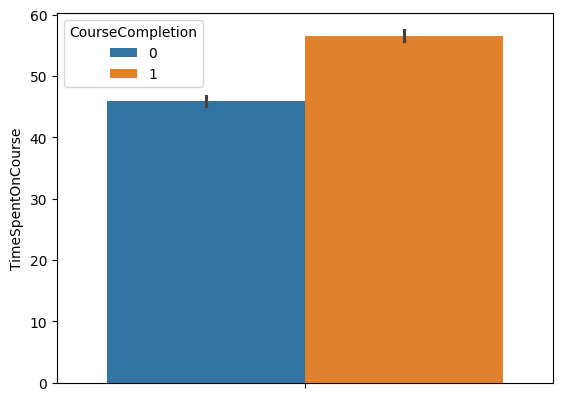

In [191]:
sns.barplot(y=Cleaned_Df['TimeSpentOnCourse'], hue=Cleaned_Df['CourseCompletion'])

## Basic Analysis : 

## **Scaling and Model Training** 

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVC
from sklearn.ensemble import RandomForestClassifier # Ramdom Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report

## **Scaling**

In [193]:
scaler = StandardScaler()
Cleaned_Df.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,Rate_batch_Q2,Rate_batch_Q3,Rate_batch_Q4,Score_batch_S2,Score_batch_S3,Score_batch_S4
0,29.98,17,3,50.37,20.86,1,0,0,1,0,0,0,0,0,0,1,0
1,27.80,1,5,62.62,65.63,1,0,0,0,0,0,0,1,0,0,1,0
2,86.82,14,2,78.46,63.81,1,1,0,0,0,0,0,1,0,0,0,1
3,35.04,17,10,59.20,95.43,0,1,0,0,0,1,0,0,1,0,1,0
4,92.49,16,0,98.43,18.10,0,0,0,0,1,0,0,0,0,0,0,1


In [194]:
# Scaling numerical columns
cols = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']

Cleaned_Df[cols] = scaler.fit_transform(Cleaned_Df[cols])

In [195]:
Cleaned_Df.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,Rate_batch_Q2,Rate_batch_Q3,Rate_batch_Q4,Score_batch_S2,Score_batch_S3,Score_batch_S4
0,-0.727292,1.144348,-0.691888,-1.724049,-1.043448,1,0,0,1,0,0,0,0,0,0,1,0
1,-0.804154,-1.527840,-0.053301,-0.869733,0.496738,1,0,0,0,0,0,0,1,0,0,1,0
2,1.276768,0.643313,-1.011181,0.234949,0.434126,1,1,0,0,0,0,0,1,0,0,0,1
3,-0.548887,1.144348,1.543166,-1.108244,1.521924,0,1,0,0,0,1,0,0,1,0,1,0
4,1.476680,0.977336,-1.649768,1.627659,-1.138398,0,0,0,0,1,0,0,0,0,0,0,1


In [196]:
Cleaned_Df.columns

Index(['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken',
       'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion',
       'CourseCategory_Business', 'CourseCategory_Health',
       'CourseCategory_Programming', 'CourseCategory_Science', 'Rate_batch_Q2',
       'Rate_batch_Q3', 'Rate_batch_Q4', 'Score_batch_S2', 'Score_batch_S3',
       'Score_batch_S4'],
      dtype='str')

## **Linear Regression**

In [197]:
# Model Train
x = Cleaned_Df.drop(columns=['CourseCompletion', 'DeviceType'])
y = Cleaned_Df['CourseCompletion']

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=42 )

model = LinearRegression()

model.fit(x_trn, y_trn)

y_pred = model.predict(x_tst)

r2_score(y_tst, y_pred)

0.37744205830154864

## **Logistic Regression**

In [198]:
model_Logic = LogisticRegression()

model_Logic.fit(x_trn, y_trn)

y_pred_logic = model_Logic.predict(x_tst)

accuracy_score(y_tst.astype(int), y_pred.astype(int))

0.5858461538461538

In [199]:
confusion_matrix(y_tst.astype(int), y_pred.astype(int))

array([[892,   2],
       [671,  60]])

In [200]:
print(classification_report(y_tst.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       894
           1       0.97      0.08      0.15       731

    accuracy                           0.59      1625
   macro avg       0.77      0.54      0.44      1625
weighted avg       0.75      0.59      0.47      1625



## **Decision Tree**

In [201]:
model_DT = DecisionTreeClassifier()

model_DT.fit(x_trn, y_trn)

y_pred_DT = model_DT.predict(x_tst)

accuracy_score(y_tst, y_pred_DT)

0.912

In [202]:
print(classification_report(y_tst, y_pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       894
           1       0.89      0.91      0.90       731

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



## **K-Nearest Neighbor(KNN)**

In [203]:
model_KNN = KNeighborsClassifier()

model_KNN.fit(x_trn, y_trn)

y_pred_KNN = model_KNN.predict(x_tst)

accuracy_score(y_tst, y_pred_KNN)

0.8449230769230769

In [204]:
print(classification_report(y_tst, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       894
           1       0.84      0.81      0.82       731

    accuracy                           0.84      1625
   macro avg       0.84      0.84      0.84      1625
weighted avg       0.84      0.84      0.84      1625



# **Support Vector Machine(SVC)**

In [205]:
model_SVC = SVC(kernel='rbf')

model_SVC.fit(x_trn, y_trn)

y_pred_SVC = model_SVC.predict(x_tst)

accuracy_score(y_tst, y_pred_SVC)

0.8886153846153846

In [206]:
print(classification_report(y_tst, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       894
           1       0.90      0.85      0.87       731

    accuracy                           0.89      1625
   macro avg       0.89      0.89      0.89      1625
weighted avg       0.89      0.89      0.89      1625



## **Random Forest**

In [207]:
model_RF = RandomForestClassifier()

model_RF.fit(x_trn, y_trn)

y_pred_RF = model_RF.predict(x_tst)

accuracy_score(y_tst, y_pred_RF)

0.9556923076923077

In [208]:
print(classification_report(y_tst, y_pred_RF))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       894
           1       0.97      0.93      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## **End**